In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

from bounds import *
from dgp import *
from vset import *
import estimation, utils, experiments, vset, plots
import pandas as pd



# Debugging IV identification

In [3]:
Dx, Du = 5, 0
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 2
}

msm_dgp = set_dgp_config(dgp, 'MSM')
data = generate_data(msm_dgp)


## Test learning outcome probabilities

In [3]:
msm_dgp = set_dgp_config(dgp, 'MSM')
data = generate_data(msm_dgp)
estimation.estimate_bounds(msm_dgp, data, id_method='MSM', est_method='oracle', K=5)

,Rs_down,Rs_up,Rd_down,Rd_up,Rs_coverage,Rd_coverage,R_oracle,metric,id_method,est_method
0,-0.442321,0.205203,-0.299383,0.046694,1,1,-0.044788,m_y=1,MSM,oracle
1,-0.453623,0.184842,-0.314613,0.024438,1,1,-0.303794,m_y=0,MSM,oracle
2,-0.621289,0.505295,-0.244548,0.128554,1,1,0.122409,m_a=0,MSM,oracle
3,-0.110657,0.269244,-0.110657,0.269244,1,1,0.124838,m_a=1,MSM,oracle
4,-0.367146,0.388546,-0.122113,0.143513,1,1,0.092100,m_u,MSM,oracle


In [84]:
estimation.estimate_bounds(msm_dgp, data, id_method='MSM', est_method='plugin', K=5)

outcome regression error: 0.043218950581498154
propensitiy error: 0.026068173306555392
outcome regression error: 0.03883126286322675
propensitiy error: 0.025846728054586564
outcome regression error: 0.04162230822009172
propensitiy error: 0.024802039095536528
outcome regression error: 0.039635756080474094
propensitiy error: 0.02578407892389513
outcome regression error: 0.03992138284299188
propensitiy error: 0.025476313405033636


,Rs_down,Rs_up,Rd_down,Rd_up,Rs_coverage,Rd_coverage,R_oracle,metric,id_method,est_method
0,-0.545193,-0.338356,-0.508254,-0.377225,1.0,1.0,-0.449353,m_y=1,MSM,plugin
1,-0.550948,-0.342820,-0.514499,-0.381328,1.0,1.0,-0.458090,m_y=0,MSM,plugin
2,-0.280651,0.218070,-0.195899,0.133319,1.0,1.0,0.001760,m_a=0,MSM,plugin
3,-0.027843,0.057846,-0.027843,0.057846,1.0,1.0,0.007186,m_a=1,MSM,plugin
4,-0.084671,0.085471,-0.028803,0.029603,1.0,1.0,0.002100,m_u,MSM,plugin


# Coverage sample size experiment 
- Construct 95% bootstrap CI around plug-in estimates of the regret. Plot as a function of sample size.
- Also plot coverage as a function of sample size.

In [4]:
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.5
}

msm_dgp = set_dgp_config(dgp, 'MSM')
Ns = [100, 300, 600, 900, 1200, 1500, msm_dgp['N']-1]
coveragedf = experiments.estimation_coverage_experiment(msm_dgp, Ns, Nsims=30)



outcome regression error: 0.20285953942991658
propensitiy error: 0.12404227289917621
outcome regression error: 0.13150460765917854
propensitiy error: 0.11548125769823739
outcome regression error: 0.18410827558246257
propensitiy error: 0.11135957852840399
outcome regression error: 0.17387643573469108
propensitiy error: 0.1067747643147989
outcome regression error: 0.14589838268206692
propensitiy error: 0.08165167636897433
outcome regression error: 0.23960048605251397
propensitiy error: 0.14607186039346481
outcome regression error: 0.17209593482208183
propensitiy error: 0.13363796061196
outcome regression error: 0.25156708515281034
propensitiy error: 0.15370054697630003
outcome regression error: 0.19725055969322586
propensitiy error: 0.10896979448478664
outcome regression error: 0.16470940450981403
propensitiy error: 0.14365327647708762
outcome regression error: 0.21792614276055172
propensitiy error: 0.13361467835614366
outcome regression error: 0.16078543442812737
propensitiy error: 0.11

outcome regression error: 0.21756146225321352
propensitiy error: 0.1248476741430327
outcome regression error: 0.24211974036868472
propensitiy error: 0.166475884145803
outcome regression error: 0.24708402906835186
propensitiy error: 0.06749777225976321
outcome regression error: 0.20846564038647064
propensitiy error: 0.11839591550484699
outcome regression error: 0.17703578600038297
propensitiy error: 0.0970325000711267
outcome regression error: 0.17605149535611128
propensitiy error: 0.1860733662680384
outcome regression error: 0.17351946538908888
propensitiy error: 0.19807967691762415
outcome regression error: 0.10931922079257365
propensitiy error: 0.15435366748988114
outcome regression error: 0.15233309910309897
propensitiy error: 0.10542472969393948
outcome regression error: 0.10202452013925209
propensitiy error: 0.15810598424143762
outcome regression error: 0.21163338484944966
propensitiy error: 0.07891298125186934
outcome regression error: 0.10359450018557015
propensitiy error: 0.118

outcome regression error: 0.09087706915497114
propensitiy error: 0.09612455784705502
outcome regression error: 0.09858465332487998
propensitiy error: 0.09891575958910687
outcome regression error: 0.10741023510181572
propensitiy error: 0.0743559957422701
outcome regression error: 0.12557294148873285
propensitiy error: 0.11395438820584435
outcome regression error: 0.12205206460706974
propensitiy error: 0.06213319209736581
outcome regression error: 0.14719667284610075
propensitiy error: 0.05395503522300483
outcome regression error: 0.144490811637548
propensitiy error: 0.08834758592259043
outcome regression error: 0.13184264957216993
propensitiy error: 0.08461280557616324
outcome regression error: 0.11040343608276931
propensitiy error: 0.07086728697329113
outcome regression error: 0.1346673580212723
propensitiy error: 0.04863231799626185
outcome regression error: 0.14274792783491214
propensitiy error: 0.05003694944525881
outcome regression error: 0.14578168411569442
propensitiy error: 0.05

outcome regression error: 0.101866675848149
propensitiy error: 0.030016468338683263
outcome regression error: 0.09041940761615551
propensitiy error: 0.05052546657742311
outcome regression error: 0.10615306590144831
propensitiy error: 0.037842743035974014
outcome regression error: 0.10805336211207614
propensitiy error: 0.03653242141581583
outcome regression error: 0.1163136889034883
propensitiy error: 0.049260447055039416
outcome regression error: 0.12869089946945353
propensitiy error: 0.0497228465083617
outcome regression error: 0.11063237603392992
propensitiy error: 0.053008408843043746
outcome regression error: 0.10855338913781519
propensitiy error: 0.04250351816757682
outcome regression error: 0.1271296595089998
propensitiy error: 0.04888193686725769
outcome regression error: 0.11274259447592776
propensitiy error: 0.04039226654818724
outcome regression error: 0.10101215287643962
propensitiy error: 0.045210791845876216
outcome regression error: 0.10191524574189934
propensitiy error: 

outcome regression error: 0.1010251619771724
propensitiy error: 0.05900016227306866
outcome regression error: 0.10746789319444937
propensitiy error: 0.07340393537809962
outcome regression error: 0.10295996087309446
propensitiy error: 0.05159610801137735
outcome regression error: 0.10133792365748756
propensitiy error: 0.047666049071866064
outcome regression error: 0.10248033070574628
propensitiy error: 0.039713529992194845
outcome regression error: 0.11831344206853879
propensitiy error: 0.04923216668821238
outcome regression error: 0.10866382213837837
propensitiy error: 0.051344668849105775
outcome regression error: 0.11394500507007235
propensitiy error: 0.04066049727573552
outcome regression error: 0.12757024371983627
propensitiy error: 0.04833488241487746
outcome regression error: 0.11588916616597579
propensitiy error: 0.062308964957875704
outcome regression error: 0.11821131168291384
propensitiy error: 0.06037183859940063
outcome regression error: 0.09509370414561986
propensitiy erro

outcome regression error: 0.11760129415643021
propensitiy error: 0.049628697630537635
outcome regression error: 0.10038691003426607
propensitiy error: 0.054533743359393504
outcome regression error: 0.10286947845493744
propensitiy error: 0.04952785462344822
outcome regression error: 0.09767129917523404
propensitiy error: 0.04438589616082735
outcome regression error: 0.09632343852866183
propensitiy error: 0.04596083062736628
outcome regression error: 0.1009167719921794
propensitiy error: 0.04370156248394355
outcome regression error: 0.10687949521867227
propensitiy error: 0.042646963675226995
outcome regression error: 0.10241893425140544
propensitiy error: 0.037675393990956936
outcome regression error: 0.10210347129975275
propensitiy error: 0.03507835104171548
outcome regression error: 0.07790219114074604
propensitiy error: 0.05190555377174751
outcome regression error: 0.10377350197710788
propensitiy error: 0.04862926635947963
outcome regression error: 0.08444494180038357
propensitiy erro

outcome regression error: 0.0913665270612219
propensitiy error: 0.03522926028116351
outcome regression error: 0.09400834592954825
propensitiy error: 0.04150102789119821
outcome regression error: 0.10279315220783118
propensitiy error: 0.04168095525968444
outcome regression error: 0.1052388573326659
propensitiy error: 0.03584160601528262
outcome regression error: 0.10014985831608453
propensitiy error: 0.033814084667099134
outcome regression error: 0.09019594750470612
propensitiy error: 0.03542903571072404
outcome regression error: 0.09798700489328821
propensitiy error: 0.029826744925091745
outcome regression error: 0.08990361621811824
propensitiy error: 0.038338086701917885
outcome regression error: 0.09789592791358935
propensitiy error: 0.048418375262284534
outcome regression error: 0.09831158880184485
propensitiy error: 0.0363216573159708
outcome regression error: 0.09721329856973798
propensitiy error: 0.036748624198933114
outcome regression error: 0.1025494083493143
propensitiy error:

outcome regression error: 0.09799801004073636
propensitiy error: 0.03783679730247424
outcome regression error: 0.09818018210502914
propensitiy error: 0.03540677082895225
outcome regression error: 0.098768124028862
propensitiy error: 0.04050784308953252
outcome regression error: 0.09508314399951584
propensitiy error: 0.04543969874097393
outcome regression error: 0.10044143477564983
propensitiy error: 0.04016853219138015
outcome regression error: 0.11428426259075808
propensitiy error: 0.033956856788077396
outcome regression error: 0.09956521206920596
propensitiy error: 0.046978205217865686
outcome regression error: 0.09925392231708476
propensitiy error: 0.04065327216731967
outcome regression error: 0.10389183651424151
propensitiy error: 0.05137528640540346
outcome regression error: 0.1135308087954378
propensitiy error: 0.042080176019439926
outcome regression error: 0.10074530755594813
propensitiy error: 0.05246029685414618
outcome regression error: 0.10211935834249125
propensitiy error: 

outcome regression error: 0.0924067399382276
propensitiy error: 0.028616403422406685
outcome regression error: 0.08440124154056113
propensitiy error: 0.03141006517585057
outcome regression error: 0.09368412282667002
propensitiy error: 0.03371347790328125
outcome regression error: 0.09931936429591218
propensitiy error: 0.029245018196544615
outcome regression error: 0.10835006946906121
propensitiy error: 0.03253097693610756
outcome regression error: 0.08851519868820304
propensitiy error: 0.03677817959825457
outcome regression error: 0.0994476704017794
propensitiy error: 0.03004185621342306
outcome regression error: 0.09171422094792393
propensitiy error: 0.037485390823639386
outcome regression error: 0.09498802085588
propensitiy error: 0.03353460198892536
outcome regression error: 0.09023357528475873
propensitiy error: 0.03306940202455991
outcome regression error: 0.08996128089885093
propensitiy error: 0.02764043681675466
outcome regression error: 0.09626534958406369
propensitiy error: 0.

outcome regression error: 0.08857010398291922
propensitiy error: 0.024340301954279737
outcome regression error: 0.08980263447389246
propensitiy error: 0.02550463590981309
outcome regression error: 0.0864698195561588
propensitiy error: 0.025633249313885095
outcome regression error: 0.08557922881242824
propensitiy error: 0.025545837706715032
outcome regression error: 0.08668254828588857
propensitiy error: 0.02398617810539516
outcome regression error: 0.0866255784510655
propensitiy error: 0.026300279679480544
outcome regression error: 0.0896286284614637
propensitiy error: 0.026559572780317873
outcome regression error: 0.08660572274685722
propensitiy error: 0.023974127330141377
outcome regression error: 0.08737788011549795
propensitiy error: 0.02578167916183124
outcome regression error: 0.08417662873854133
propensitiy error: 0.02453213288468197
outcome regression error: 0.08684093192533775
propensitiy error: 0.026248266884916417
outcome regression error: 0.0869377337481343
propensitiy erro

outcome regression error: 0.09223591944408159
propensitiy error: 0.026027339845090182
outcome regression error: 0.08370051586762146
propensitiy error: 0.02546285543285191
outcome regression error: 0.08656274886942175
propensitiy error: 0.025701159752925633
outcome regression error: 0.08711997430087899
propensitiy error: 0.025824401729782634
outcome regression error: 0.08482110578113324
propensitiy error: 0.02776043139196542
outcome regression error: 0.08910737015248658
propensitiy error: 0.0240261947565082
outcome regression error: 0.08644566935444588
propensitiy error: 0.024089899191966063
outcome regression error: 0.08492828553662744
propensitiy error: 0.02504324981484278
outcome regression error: 0.08760246212098749
propensitiy error: 0.025310967343338923
outcome regression error: 0.08812912523560212
propensitiy error: 0.025416518605640457
outcome regression error: 0.08656505389406405
propensitiy error: 0.024874257500804887
outcome regression error: 0.08733691593621735
propensitiy e

Text(0, 0.5, 'Accuracy regret')

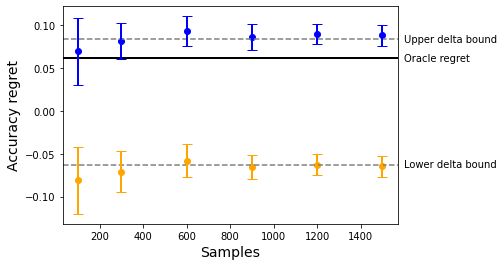

In [10]:
ns_data = experiments.get_est_exp_metadata(coveragedf, Ns)
ns_data = ns_data[ns_data['metric'] == 'm_u']

oracle_up = ns_data['Rd_up_oracle'].tolist()[-1]
oracle_down = ns_data['Rd_down_oracle'].tolist()[-1]
oracle = ns_data['R_oracle'].tolist()[-1]
ns_data = ns_data.iloc[:-1,:]

plt.axhline(oracle_up, color='grey', linestyle='--')
plt.axhline(oracle_down, color='grey', linestyle='--')
plt.axhline(oracle, color='k', linewidth=2,label='$R^*$')

plt.scatter(ns_data['N'], ns_data['Rd_up_pl_mean'], color='blue')
for ix,n in enumerate(ns_data['N']):
    plt.errorbar(n, ns_data['Rd_up_pl_mean'].tolist()[ix], yerr=ns_data['Rd_up_pl_ci'].tolist()[ix],capsize=5, linewidth=2, elinewidth=2, color='blue')

plt.scatter(ns_data['N'], ns_data['Rd_down_pl_mean'], color='orange')
for ix,n in enumerate(ns_data['N']):
    plt.errorbar(n, ns_data['Rd_down_pl_mean'].tolist()[ix], yerr=ns_data['Rd_down_pl_ci'].tolist()[ix],capsize=5, linewidth=2, elinewidth=2, color='orange')
    
# Determine the X location for the text boxes (adjust as needed)
x_loc = max(ns_data['N']) + 100  # Adjust the offset (10 here) as needed

# Add text boxes
plt.text(x_loc, oracle_up, 'Upper delta bound', va='center')
plt.text(x_loc, oracle_down, r'Lower delta bound', va='center', clip_on=False)
plt.text(x_loc, oracle, 'Oracle regret', va='center')

plt.xlabel('Samples', fontsize=14)
plt.ylabel('Accuracy regret', fontsize=14)

Text(0, 0.5, 'Coverage (%)')

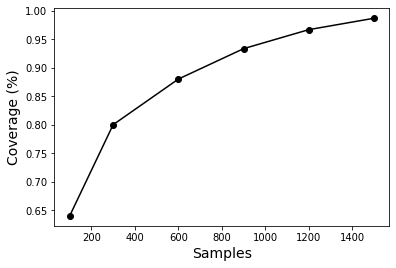

In [11]:
samples = coveragedf[(coveragedf['est_method'] == 'plugin') & (coveragedf['metric'] == 'm_u')]
coverage = samples.groupby('N').mean()['Rd_coverage'].tolist()[:-1]
N = samples.groupby('N').mean().reset_index()['N'].tolist()[:-1]

plt.plot(N, coverage, marker='o', color='k')
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Coverage (%)', fontsize=14)

# Design sensitivity experiment 
- Delta bounds enable certifying a policy improvement up to a larger magnitude of confounding

In [3]:
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.5,
    'lambda_star': 1.1
}

msm_dgp = set_dgp_config(dgp, 'MSM')
data = generate_data(msm_dgp)

outcome regression error: 0.022279474430965663
propensitiy error: 0.06722462036670811
outcome regression error: 0.022841493404315145
propensitiy error: 0.06492576650051801
outcome regression error: 0.02582209270952485
propensitiy error: 0.06643707557094018
outcome regression error: 0.020946866679102012
propensitiy error: 0.06667957237653827
outcome regression error: 0.02194599278924212
propensitiy error: 0.06561717191140493
outcome regression error: 0.02194996320605552
propensitiy error: 0.06660016899196287
outcome regression error: 0.0217454737034632
propensitiy error: 0.06573549689809748
outcome regression error: 0.02204312795452672
propensitiy error: 0.06692597494256476
outcome regression error: 0.0215267886374504
propensitiy error: 0.06538439211056032
outcome regression error: 0.02470019667909677
propensitiy error: 0.06606806711446328
outcome regression error: 0.02213300067188061
propensitiy error: 0.06631042560595686
outcome regression error: 0.022282176931005235
propensitiy error

propensitiy error: 0.06622721221195567
outcome regression error: 0.023051726070661714
propensitiy error: 0.065815421519234
outcome regression error: 0.02323196682059609
propensitiy error: 0.06809293323675515
outcome regression error: 0.022492680573025305
propensitiy error: 0.06446399950836773
outcome regression error: 0.023148061965329335
propensitiy error: 0.06702359306644844
outcome regression error: 0.022227131671784982
propensitiy error: 0.0661023113033816
outcome regression error: 0.020511709323651938
propensitiy error: 0.06653554633897744
outcome regression error: 0.023306654230731843
propensitiy error: 0.06551738177433068
outcome regression error: 0.02357352995599847
propensitiy error: 0.06626499330846065
outcome regression error: 0.023355763867461854
propensitiy error: 0.06574137107697066
outcome regression error: 0.021196101243756274
propensitiy error: 0.06663139717324518
outcome regression error: 0.021509099232410393
propensitiy error: 0.06612334321994545
outcome regression e

outcome regression error: 0.02268959041544689
propensitiy error: 0.06625980844029845
outcome regression error: 0.021380725785741052
propensitiy error: 0.06552704023035753
outcome regression error: 0.023689343203957228
propensitiy error: 0.06534233529804755
outcome regression error: 0.02330067447486436
propensitiy error: 0.06722095325298662
outcome regression error: 0.023301491825175092
propensitiy error: 0.06755097364848697
outcome regression error: 0.02232689050785511
propensitiy error: 0.06617955313960365
outcome regression error: 0.022787227955150733
propensitiy error: 0.06613874723704959
outcome regression error: 0.02173289947844093
propensitiy error: 0.06354059844329604
outcome regression error: 0.021829365605996933
propensitiy error: 0.06678352611385299
outcome regression error: 0.02366997843922244
propensitiy error: 0.06576015326452397
outcome regression error: 0.022456388670675224
propensitiy error: 0.0665318691136207
outcome regression error: 0.02239723194151184
propensitiy er

propensitiy error: 0.06521993739181896
outcome regression error: 0.021189878392477837
propensitiy error: 0.06650576325134196
outcome regression error: 0.024148450490963036
propensitiy error: 0.06754440896204585
outcome regression error: 0.021341725160356866
propensitiy error: 0.06628282070689968
outcome regression error: 0.02328884738548142
propensitiy error: 0.06678048179760271
outcome regression error: 0.024674825904324123
propensitiy error: 0.06602961493637895
outcome regression error: 0.023148868726078683
propensitiy error: 0.06644802725534149
outcome regression error: 0.022510428021744088
propensitiy error: 0.06413380250321003
outcome regression error: 0.0221312054093474
propensitiy error: 0.06756508905389155
outcome regression error: 0.021764494836325064
propensitiy error: 0.06573025803639948
outcome regression error: 0.023580416907060447
propensitiy error: 0.06647358912825028
outcome regression error: 0.02181908171790575
propensitiy error: 0.06544147278361882
outcome regression 

outcome regression error: 0.023777531704520013
propensitiy error: 0.06519796911692032
outcome regression error: 0.0229971939357447
propensitiy error: 0.0661579267267895
outcome regression error: 0.022766774754292705
propensitiy error: 0.06684952569565872
outcome regression error: 0.021405409394232352
propensitiy error: 0.0672219816187571
outcome regression error: 0.022702091419521495
propensitiy error: 0.06636464801256602
outcome regression error: 0.023498065228774147
propensitiy error: 0.0648660208604714
outcome regression error: 0.022460395618729416
propensitiy error: 0.0655294884618379
outcome regression error: 0.022177355895107716
propensitiy error: 0.06642852106162991
outcome regression error: 0.025153938428007498
propensitiy error: 0.06516656333009659
outcome regression error: 0.022915764130143585
propensitiy error: 0.0650427964058913
outcome regression error: 0.02163652597090586
propensitiy error: 0.06603197112766936
outcome regression error: 0.024133814700819108
propensitiy err

outcome regression error: 0.02216221551869044
propensitiy error: 0.06472731391546574
outcome regression error: 0.023642699129521712
propensitiy error: 0.06622606251024231
outcome regression error: 0.02296809761067584
propensitiy error: 0.06741383826292516
outcome regression error: 0.022787721731081536
propensitiy error: 0.0668159723864344
outcome regression error: 0.022547152118384574
propensitiy error: 0.0665192153465649
outcome regression error: 0.02387822276363696
propensitiy error: 0.06609076050047949
outcome regression error: 0.020886992338891085
propensitiy error: 0.06685514712179028
outcome regression error: 0.021614763710233083
propensitiy error: 0.06658411301710321
outcome regression error: 0.022445742940708436
propensitiy error: 0.06683103329253012
outcome regression error: 0.02257601720509543
propensitiy error: 0.06477758080392851
outcome regression error: 0.022834427217526664
propensitiy error: 0.06709913775987701
outcome regression error: 0.022792191631040494
propensitiy e

outcome regression error: 0.021815283082845548
propensitiy error: 0.06539508974119107
outcome regression error: 0.021635812665888324
propensitiy error: 0.06784938457840702
outcome regression error: 0.024859107043385762
propensitiy error: 0.06709622138560303
outcome regression error: 0.02337995662970537
propensitiy error: 0.06721092876914901
outcome regression error: 0.02218997440500874
propensitiy error: 0.06647484273730529
outcome regression error: 0.021640259092759438
propensitiy error: 0.0664255425702255
outcome regression error: 0.02095946521945864
propensitiy error: 0.0638243911986166
outcome regression error: 0.023578275318539177
propensitiy error: 0.06571015181967987
outcome regression error: 0.022301725071571302
propensitiy error: 0.0678641129127983
outcome regression error: 0.02183596162792576
propensitiy error: 0.06566027498193622
outcome regression error: 0.021893346042234415
propensitiy error: 0.06731523250378264
outcome regression error: 0.02125756568946867
propensitiy err

outcome regression error: 0.02136860088106044
propensitiy error: 0.06403428149584016
outcome regression error: 0.022549595382079395
propensitiy error: 0.06520659881301183
outcome regression error: 0.02315750337274174
propensitiy error: 0.06495953159125577
outcome regression error: 0.02158523295759616
propensitiy error: 0.06801679898531829
outcome regression error: 0.024564283906282163
propensitiy error: 0.0685053163139524
outcome regression error: 0.022674553024775133
propensitiy error: 0.06626441310323646
outcome regression error: 0.021848934253330766
propensitiy error: 0.06681264806462547
outcome regression error: 0.023226356531854186
propensitiy error: 0.06575860255084863
outcome regression error: 0.024304855791202066
propensitiy error: 0.06669268530268889
outcome regression error: 0.024056334842487245
propensitiy error: 0.06574585222759322
outcome regression error: 0.020881131087219288
propensitiy error: 0.06409750212744564
outcome regression error: 0.02313414488822851
propensitiy 

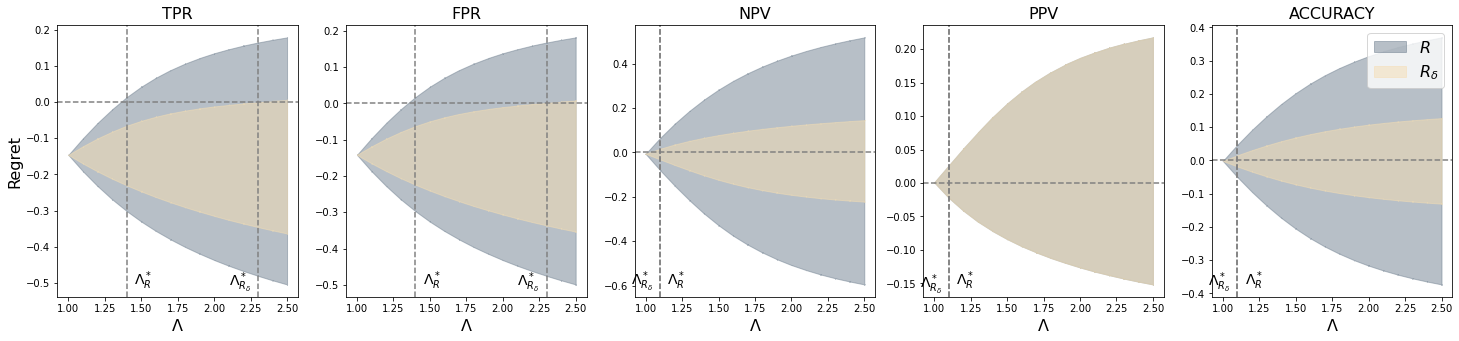

In [4]:
lambdas = np.arange(1, 2.6, .1)
brdf = experiments.design_sensitivity_exp(dgp, data, lambdas, n_sims=10)
plots.plot_design_sensitivity(brdf)

# Experiment: Exclusion restriction violation tests

outcome regression error: 0.07258748663440284
propensitiy error: 0.05310676766446926
outcome regression error: 0.07479494945077522
propensitiy error: 0.052934421399780496
outcome regression error: 0.072431254016736
propensitiy error: 0.052372148982502184
outcome regression error: 0.07425158965856185
propensitiy error: 0.05420963174816946
outcome regression error: 0.07295503115312146
propensitiy error: 0.05177684717817003
outcome regression error: 0.0734022767376724
propensitiy error: 0.051910998387862624
outcome regression error: 0.0710746363213728
propensitiy error: 0.05025211322780006
outcome regression error: 0.07189536454932502
propensitiy error: 0.05103127347406047
outcome regression error: 0.07426298233042444
propensitiy error: 0.053037980272071794
outcome regression error: 0.07347405842594411
propensitiy error: 0.052136248908417074
outcome regression error: 0.07260043980102865
propensitiy error: 0.051208388580088506
outcome regression error: 0.07206431936380407
propensitiy error

outcome regression error: 0.07258780451856182
propensitiy error: 0.052101457315342714
outcome regression error: 0.07278529821728542
propensitiy error: 0.05334931492022622
outcome regression error: 0.07312907535410727
propensitiy error: 0.05318222183371226
outcome regression error: 0.07454397499979948
propensitiy error: 0.054291573412812794
outcome regression error: 0.07343206900569575
propensitiy error: 0.054731176189646576
outcome regression error: 0.07416255358502692
propensitiy error: 0.052720968371562954
outcome regression error: 0.0742349971403813
propensitiy error: 0.05314629383321811
outcome regression error: 0.07417194634482017
propensitiy error: 0.05232308281285202
outcome regression error: 0.07331891515611202
propensitiy error: 0.051575420146214475
outcome regression error: 0.0732192878886464
propensitiy error: 0.05176127706853587
outcome regression error: 0.072987211792159
propensitiy error: 0.05015095161582814
outcome regression error: 0.07419410667291518
propensitiy error:

outcome regression error: 0.07244286609243313
propensitiy error: 0.05084664926146408
outcome regression error: 0.0727169119274386
propensitiy error: 0.04916578904253034
outcome regression error: 0.07018697586936605
propensitiy error: 0.048824978828480324
outcome regression error: 0.0736676042575863
propensitiy error: 0.052015893709019226
outcome regression error: 0.0712347981140332
propensitiy error: 0.049127158169100155
outcome regression error: 0.07178770327453922
propensitiy error: 0.05359811188348111
outcome regression error: 0.07078033046522582
propensitiy error: 0.05225102519126575
outcome regression error: 0.07182840590947652
propensitiy error: 0.05319626474042717
outcome regression error: 0.07162117726586219
propensitiy error: 0.05261619317293563
outcome regression error: 0.07183364734985924
propensitiy error: 0.05379707559426138
outcome regression error: 0.07236508325998506
propensitiy error: 0.051413989502270704
outcome regression error: 0.07388242585244614
propensitiy error:

outcome regression error: 0.0728499509572916
propensitiy error: 0.05281292160429621
outcome regression error: 0.0736035426765337
propensitiy error: 0.05279999987472352
outcome regression error: 0.07207806404084163
propensitiy error: 0.05293533743533761
outcome regression error: 0.07429820575169085
propensitiy error: 0.0522017656717304
outcome regression error: 0.07486723091823956
propensitiy error: 0.054049526599350244
outcome regression error: 0.07290258461249824
propensitiy error: 0.05487575460719906
outcome regression error: 0.07436368958605645
propensitiy error: 0.052994999705347004
outcome regression error: 0.07320151568096207
propensitiy error: 0.054178633764506795
outcome regression error: 0.07254129846999101
propensitiy error: 0.05353185922256788
outcome regression error: 0.0725681007414107
propensitiy error: 0.053875942179049834
outcome regression error: 0.07320967648520647
propensitiy error: 0.051740766828995734
outcome regression error: 0.07528855823800248
propensitiy error:

outcome regression error: 0.0725039220499277
propensitiy error: 0.052839020473791035
outcome regression error: 0.07154542698150036
propensitiy error: 0.05274249943018432
outcome regression error: 0.07325862582191808
propensitiy error: 0.05337966951801079
outcome regression error: 0.07225247177292823
propensitiy error: 0.053445617673980025
outcome regression error: 0.07340509909402707
propensitiy error: 0.05417327668928347
outcome regression error: 0.07289006923220892
propensitiy error: 0.054473083127594885
outcome regression error: 0.07200747878240045
propensitiy error: 0.053572039996111084
outcome regression error: 0.07349772982079719
propensitiy error: 0.05306099259065201
outcome regression error: 0.07359230220815492
propensitiy error: 0.05453909692135948
outcome regression error: 0.07169547577057181
propensitiy error: 0.05289030251960231
outcome regression error: 0.07212420689612495
propensitiy error: 0.05262756736310967
outcome regression error: 0.07192150956292466
propensitiy erro

outcome regression error: 0.07216402575878998
propensitiy error: 0.05226547313103627
outcome regression error: 0.07240918271609109
propensitiy error: 0.05331397687238686
outcome regression error: 0.07133825635301239
propensitiy error: 0.04996749367909783
outcome regression error: 0.07415349827493542
propensitiy error: 0.05263568210770193
outcome regression error: 0.07156262880888122
propensitiy error: 0.05258257271279992
outcome regression error: 0.07178783040897997
propensitiy error: 0.05317387971841568
outcome regression error: 0.07232146285851818
propensitiy error: 0.05394510790018364
outcome regression error: 0.07297059320221481
propensitiy error: 0.05277013476145567
outcome regression error: 0.07019245926566298
propensitiy error: 0.0523427552752658
outcome regression error: 0.07362910513649809
propensitiy error: 0.0532796524205711
outcome regression error: 0.07356522969094312
propensitiy error: 0.05261164599027688
outcome regression error: 0.07492141936520337
propensitiy error: 0.

outcome regression error: 0.07250774681941317
propensitiy error: 0.05246655393788884
outcome regression error: 0.07102698728842187
propensitiy error: 0.05331233400447746
outcome regression error: 0.0715806082353969
propensitiy error: 0.053327830020882885
outcome regression error: 0.0718823595295068
propensitiy error: 0.05385118665462302
outcome regression error: 0.07164159303793138
propensitiy error: 0.05239537315823625
outcome regression error: 0.07315648940907855
propensitiy error: 0.050127255667043784
outcome regression error: 0.07474368490511095
propensitiy error: 0.0519513572901684
outcome regression error: 0.07265180114831325
propensitiy error: 0.05081054582717152
outcome regression error: 0.07202921151387136
propensitiy error: 0.05019660253528606
outcome regression error: 0.07328335852642262
propensitiy error: 0.0498233902118657
outcome regression error: 0.07302116471748366
propensitiy error: 0.05139140507172888
outcome regression error: 0.07280036489723606
propensitiy error: 0.

outcome regression error: 0.070773882575085
propensitiy error: 0.05277131741094669
outcome regression error: 0.07144385142057857
propensitiy error: 0.05257042474313953
outcome regression error: 0.07290564967131424
propensitiy error: 0.05315170813871267
outcome regression error: 0.07345906937670732
propensitiy error: 0.05393550617151218
outcome regression error: 0.07197078958827055
propensitiy error: 0.05220618351223028
outcome regression error: 0.0716005738189516
propensitiy error: 0.05174050279632496
outcome regression error: 0.0706146450675518
propensitiy error: 0.05232631173512547
outcome regression error: 0.07049446594033854
propensitiy error: 0.05223644147177025
outcome regression error: 0.07193838481709464
propensitiy error: 0.05176433144596558
outcome regression error: 0.07088006729715628
propensitiy error: 0.05206520880744405
outcome regression error: 0.07173242098909077
propensitiy error: 0.052097968411424986
outcome regression error: 0.07250388966083027
propensitiy error: 0.0

outcome regression error: 0.0701334012580523
propensitiy error: 0.05013800110494506
outcome regression error: 0.07088339662024379
propensitiy error: 0.05104423488218739
outcome regression error: 0.07130362604461961
propensitiy error: 0.052035364427656564
outcome regression error: 0.07207242318991469
propensitiy error: 0.05105662989443212
outcome regression error: 0.07062835076056047
propensitiy error: 0.05312326549059981
outcome regression error: 0.07077696577096723
propensitiy error: 0.0519250256753887
outcome regression error: 0.07195280325152041
propensitiy error: 0.050573406620566586
outcome regression error: 0.07217287620506366
propensitiy error: 0.0533325540689877
outcome regression error: 0.07135334815291182
propensitiy error: 0.05217165604153761
outcome regression error: 0.07186873385215625
propensitiy error: 0.052941659125178474
outcome regression error: 0.07108419360225937
propensitiy error: 0.0539639808929267
outcome regression error: 0.0712005696877661
propensitiy error: 0.

outcome regression error: 0.07018794144224139
propensitiy error: 0.05019686009481689
outcome regression error: 0.0699375448821398
propensitiy error: 0.050206114189339505
outcome regression error: 0.07224654095715385
propensitiy error: 0.05191915543831574
outcome regression error: 0.0720044959933285
propensitiy error: 0.05195475343760417
outcome regression error: 0.07052825573627136
propensitiy error: 0.05103216007017393
outcome regression error: 0.07252269346545416
propensitiy error: 0.05187206922317198
outcome regression error: 0.07101836295350282
propensitiy error: 0.051983040525367966
outcome regression error: 0.0703394317503635
propensitiy error: 0.05202297098773164
outcome regression error: 0.07076495209495588
propensitiy error: 0.052772472190358584
outcome regression error: 0.07177890463928444
propensitiy error: 0.05205824776936592
outcome regression error: 0.06960993404373221
propensitiy error: 0.05082129389972812
outcome regression error: 0.07024538054400907
propensitiy error: 

outcome regression error: 0.07137277023523353
propensitiy error: 0.051074471027705674
outcome regression error: 0.07114335952437309
propensitiy error: 0.05083501023740179
outcome regression error: 0.07226457250073857
propensitiy error: 0.0507908962065312
outcome regression error: 0.07051521742894311
propensitiy error: 0.05034830549030277
outcome regression error: 0.07022530359074139
propensitiy error: 0.051570099626442045
outcome regression error: 0.07119770410450046
propensitiy error: 0.051209495421001554
outcome regression error: 0.07087389436751237
propensitiy error: 0.05131346057363173


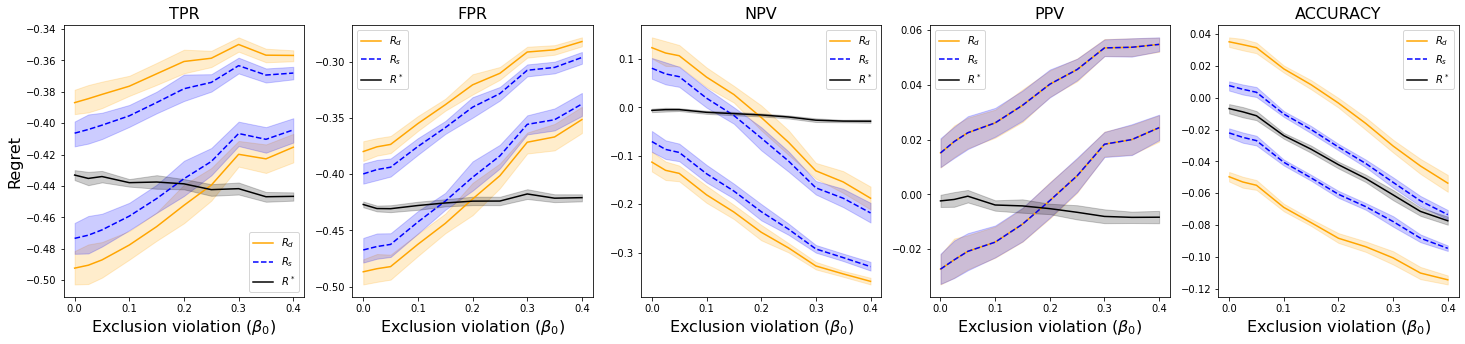

In [2]:
lambda_star = 1.1
lambdas = np.arange(1, 2.6, .1)
Nsims = 10

Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 20000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.5,
    'lambda_star': 1.7,
    'id_assumption': 'IV'
}

dgp = set_dgp_config(dgp, 'IV')
beta_zy = [0, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
bedf = experiments.exclusion_sensitivity_experiment(dgp, beta_zy, n_sims=20, est_method='plugin', K=5)
plots.plot_exclusion_sensitivity(bedf)

# Experiment: Relevance violation tests

outcome regression error: 0.10007108148929081
propensitiy error: 0.0637646628754961
outcome regression error: 0.10128595863245872
propensitiy error: 0.066823989078117
outcome regression error: 0.10322982691787261
propensitiy error: 0.06851342908173297
outcome regression error: 0.09853863562460605
propensitiy error: 0.06399183653883433
outcome regression error: 0.10063754595594576
propensitiy error: 0.0656917103049983
outcome regression error: 0.0988133584313754
propensitiy error: 0.06630768768635183
outcome regression error: 0.10298519132026612
propensitiy error: 0.06812135870023664
outcome regression error: 0.09780110666551559
propensitiy error: 0.0665441941034784
outcome regression error: 0.09498475074630355
propensitiy error: 0.06570416602064834
outcome regression error: 0.09632684740493172
propensitiy error: 0.06604291298448087
outcome regression error: 0.09958540493333136
propensitiy error: 0.0672733162233753
outcome regression error: 0.09612658318249108
propensitiy error: 0.06462

outcome regression error: 0.1002093115690633
propensitiy error: 0.0652737578592696
outcome regression error: 0.10009198241102396
propensitiy error: 0.06361971738769673
outcome regression error: 0.10058819184306524
propensitiy error: 0.0632482777544667
outcome regression error: 0.09787455271638268
propensitiy error: 0.06183138227561879
outcome regression error: 0.09975694006475365
propensitiy error: 0.0649716613606071
outcome regression error: 0.09715030977766279
propensitiy error: 0.06337946304418601
outcome regression error: 0.09846108925832743
propensitiy error: 0.0639521966637399
outcome regression error: 0.0975008491393967
propensitiy error: 0.06268128465130014
outcome regression error: 0.0979455384540022
propensitiy error: 0.062411406213009224
outcome regression error: 0.09677013788087199
propensitiy error: 0.06355022875254845
outcome regression error: 0.09501796664784991
propensitiy error: 0.06114070766329384
outcome regression error: 0.09824796309090779
propensitiy error: 0.0636

outcome regression error: 0.09947169791101289
propensitiy error: 0.06138875838640146
outcome regression error: 0.09988437679241184
propensitiy error: 0.06143134075764681
outcome regression error: 0.10011198497181843
propensitiy error: 0.06218423369836248
outcome regression error: 0.09820359131954273
propensitiy error: 0.060582922019933025
outcome regression error: 0.09731280658324391
propensitiy error: 0.05934692249643874
outcome regression error: 0.10059836577776037
propensitiy error: 0.06080667598876392
outcome regression error: 0.10025670159027053
propensitiy error: 0.061639194548615495
outcome regression error: 0.10075328660905913
propensitiy error: 0.06053309773941568
outcome regression error: 0.09926991935012014
propensitiy error: 0.06020504857905773
outcome regression error: 0.10050969663379615
propensitiy error: 0.06369273626208174
outcome regression error: 0.09965577293826021
propensitiy error: 0.05982345964255664
outcome regression error: 0.09603508651579165
propensitiy error

outcome regression error: 0.09713639208352398
propensitiy error: 0.0563275701750238
outcome regression error: 0.0977219078308996
propensitiy error: 0.05270986265654726
outcome regression error: 0.10043833327305823
propensitiy error: 0.054686305574835004
outcome regression error: 0.09543895243662996
propensitiy error: 0.05169426131993681
outcome regression error: 0.09752346511652916
propensitiy error: 0.05302666742324351
outcome regression error: 0.09702762537305006
propensitiy error: 0.05174154597751668
outcome regression error: 0.09883349924502076
propensitiy error: 0.053697575681144874
outcome regression error: 0.10026738530039336
propensitiy error: 0.05427881197289044
outcome regression error: 0.09891950417899927
propensitiy error: 0.054276427853204766
outcome regression error: 0.09971796567467532
propensitiy error: 0.05377831260300961
outcome regression error: 0.09624200602012715
propensitiy error: 0.05340968726319024
outcome regression error: 0.09531369630029005
propensitiy error:

outcome regression error: 0.09737334835795218
propensitiy error: 0.046285064193557886
outcome regression error: 0.09993434750539174
propensitiy error: 0.04768610618332794
outcome regression error: 0.09718251977226583
propensitiy error: 0.04761672667514682
outcome regression error: 0.09620318251191566
propensitiy error: 0.04702507478977946
outcome regression error: 0.09735423243724271
propensitiy error: 0.045470272859856206
outcome regression error: 0.09903860998460223
propensitiy error: 0.047611139339285166
outcome regression error: 0.0988819843595212
propensitiy error: 0.04676406752073308
outcome regression error: 0.09759983703255319
propensitiy error: 0.04615257724548151
outcome regression error: 0.09946787145912028
propensitiy error: 0.04742761798942326
outcome regression error: 0.09525183088748315
propensitiy error: 0.04448734859646751
outcome regression error: 0.0986685415137101
propensitiy error: 0.044929028417863316
outcome regression error: 0.09675362519092041
propensitiy error

outcome regression error: 0.09945279413564702
propensitiy error: 0.04315426978555239
outcome regression error: 0.10140086524979523
propensitiy error: 0.04260176362912465
outcome regression error: 0.10044291804076469
propensitiy error: 0.04027097530144747
outcome regression error: 0.09827519812918789
propensitiy error: 0.0403139754868907
outcome regression error: 0.10387293199916113
propensitiy error: 0.042880895347508066
outcome regression error: 0.09853345007806949
propensitiy error: 0.04051571904440947
outcome regression error: 0.10033514412330152
propensitiy error: 0.04216267143052016
outcome regression error: 0.09872776097213781
propensitiy error: 0.04011310669702829
outcome regression error: 0.10105429424062663
propensitiy error: 0.04108058671591897
outcome regression error: 0.09968549013955796
propensitiy error: 0.042674332162234235
outcome regression error: 0.09977111921167907
propensitiy error: 0.0405833490124929
outcome regression error: 0.09743393030596298
propensitiy error: 

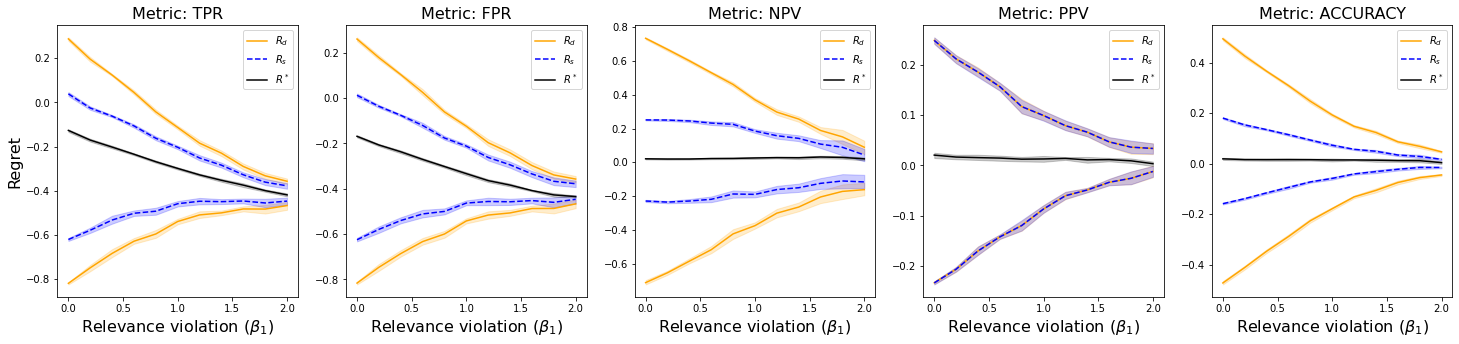

In [7]:
lambdas = np.arange(1, 2.6, .1)
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.5,
    'lambda_star': 1.7,
    'id_assumption': 'IV'
}

iv_dgp = set_dgp_config(dgp, 'IV')
beta_zd = [0, .2, .4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
brdf = experiments.relevance_sensitivity_experiment(iv_dgp, beta_zd, n_sims=10)
plots.plot_relevance_sensitivity(brdf)


## Robustness check: MSM $\Lambda$ coverage

In [25]:
lambda_star = 1.1
lambdas = np.arange(1, 2.6, .1)
Nsims = 10

Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.2,
    'id_assumption': 'MSM'
}

msm_dgp = set_dgp_config(dgp, 'MSM')
lambda_star = [0, .2, .4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4]

msm_bounds = []

for ls in lambda_star:
    
    msm_dgp['lambda_star'] = ls
    
    print()
    print('MSM data generating process:', msm_dgp)
    print()
    
    for sim in range(Nsims):
        
        data = generate_data(msm_dgp)
        bounds = estimation.estimate_bounds(msm_dgp, data, id_method='MSM', est_method='oracle', K=5)
        bounds['ls'] = ls
        msm_bounds.append(bounds)

msmdf = pd.concat(msm_bounds)



MSM data generating process: {'N': 10000, 'Dx': 5, 'Du': 2, 'nz': 10, 'beta_zy': 0, 'e1_coeffs': array([ 1.5513685 , -0.98958659, -1.27109368, -0.35070782, -1.65436475,
        0.60861619, -1.39788045]), 'z_coeffs': array([0., 0., 0., 0., 0., 0., 0.]), 'mu1_coeffs': array([ 0.73979635,  2.45670058, -0.39865531,  1.44024039,  0.82705669,
        1.15371496, -0.20305052]), 'mu0_coeffs': array([ 1.90714731, -0.45589173,  0.58797949, -1.13605736,  0.84825902,
        1.32506545,  0.71618319]), 'lambda': 1.2, 'id_assumption': 'MSM', 'lambda_star': 0, 'beta_zd': 0}


MSM data generating process: {'N': 10000, 'Dx': 5, 'Du': 2, 'nz': 10, 'beta_zy': 0, 'e1_coeffs': array([ 1.5513685 , -0.98958659, -1.27109368, -0.35070782, -1.65436475,
        0.60861619, -1.39788045]), 'z_coeffs': array([0., 0., 0., 0., 0., 0., 0.]), 'mu1_coeffs': array([ 0.73979635,  2.45670058, -0.39865531,  1.44024039,  0.82705669,
        1.15371496, -0.20305052]), 'mu0_coeffs': array([ 1.90714731, -0.45589173,  0.5879794

In [1]:


lam = msm_dgp['lambda']

metrics = msmdf['metric'].unique().tolist()

fig, axes = plt.subplots(1, 5, figsize=(25, 5)) # Adjust the figsize as needed

for i, metric in enumerate(metrics):
    
    # Filter the DataFrame for the current metric
    metric_df = msmdf[msmdf['metric'] == metric]
    
    # Reset the index to avoid the duplicate labels error
    metric_df = metric_df.reset_index(drop=True)
    ymin = metric_df[['Rs_down', 'Rs_up', 'Rd_down', 'Rd_up', 'R_oracle']].min().min()
    ymax = metric_df[['Rs_down', 'Rs_up', 'Rd_down', 'Rd_up', 'R_oracle']].max().max()
    
    # Create each lineplot on the corresponding subplot axis
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='Rs_up', color='orange', linestyle='-', label='$R_d$')
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='Rs_down', color='orange', linestyle='-')
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='Rd_up', color='blue', linestyle='--', label='$R$')
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='Rd_down', color='blue', linestyle='--')
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='R_oracle', color='black', label='$R^*$')

    # Set the titles, labels, etc.
    axes[i].set_xlabel(r'$\Lambda^*$', fontsize=16)
    axes[i].set_title(f'{utils.metric_dict[metric]}, $\Lambda={lam}$', fontsize=16)
    axes[i].set_ylabel(f'', fontsize=16)
    
    ymin, ymax = axes[i].get_ylim()
    axes[i].fill_between([lam**-1, lam], ymin, ymax, color='grey',
                         alpha=0.5, zorder=-1, label='Assumption')
    axes[i].legend().set_visible(False)
    

    
axes[0].set_ylabel(f'Regret', fontsize=16)
axes[0].legend(fontsize=14)

NameError: name 'msm_dgp' is not defined

## Debugging MSM lambda setup

In [16]:
lambda_star = 1.1
lambdas = np.arange(1, 2.6, .1)
Nsims = 10

Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.6,
    'id_assumption': 'MSM'
}


dgp = set_dgp_config(dgp, 'MSM')
dgp['lambda'] = 1.4

# data = generate_data(dgp)
# estimation.estimate_bounds(dgp, data, id_method='MSM', est_method='oracle', K=5)


In [17]:
check_dgp_config(dgp)

# Co-variate information
N, Dx, Du = dgp['N'], dgp['Dx'], dgp['Du']
nD = Dx+Du

# Proxy information
nz, beta_zd, beta_zy = dgp['nz'], dgp['beta_zd'], dgp['beta_zy']

e1_coeffs = dgp['e1_coeffs'].copy()
z_coeffs = dgp['z_coeffs'].copy()
mu1_coeffs = dgp['mu1_coeffs'].copy()
mu0_coeffs = dgp['mu0_coeffs'].copy()

norm = 1/(2*np.sqrt(nD))
T = np.random.binomial(1,.35*np.ones(N))

# Sample measured and unmeasured confounders
mean, cov = np.zeros(nD), np.eye(nD)
XU = np.random.multivariate_normal(mean, cov, N)

# Compute the probability distribution for Z
prob_Z = np.exp(z_coeffs*XU)
prob_Z = prob_Z / np.sum(prob_Z.sum(axis=1))  
weights = np.random.rand(nD, nz)
logits = np.dot(XU, weights)
pZ = softmax(logits)

# Sample instrument values
Z = np.argmax(np.array([np.random.multinomial(1, p) for p in pZ]), axis=1)

# Treatment propensity is a function of X, U and Z. Beta is a scaling factor.    
pD = e1(dgp, e1_coeffs, XU, Z)
D = np.random.binomial(1, pD)
p_mu_1 = mu(dgp, mu1_coeffs, XU, Z)

if dgp['id_assumption'] == 'MSM':
    print('msm')
    p_mu_0 = np.clip(dgp['lambda_star'] * p_mu_1, 0, 1)

else:
    p_mu_0 = mu(dgp, dgp['mu0_coeffs'], XU, Z)

# Oracle probabilities independent from sampled D
p_mu = pD*p_mu_1 + (1-pD)*p_mu_0

# Potential outcomes conditional on sampled D
p_y = np.zeros_like(p_mu)
p_y[D==1] = p_mu_1[D==1]
p_y[D==0] = p_mu_0[D==0]
Y = np.random.binomial(1, p_y)

data = {
        'Y': Y,
        'p_mu_1': p_mu_1,
        'p_mu': p_mu,
        'p_e1': pD,
        'D': D,
        'XU': XU,
        'Z': Z,
        'T': T
    }

msm


In [27]:
XU, Z, T, Y, D = data['XU'], data['Z'], data['T'], data['Y'], data['D']

p_mu1 = p_mu_1
p_e1 = pD

mu_down = np.clip((1/dgp['lambda']) * p_mu1, 0, 1)
mu_up = np.clip(dgp['lambda'] * p_mu1, 0, 1)
p_e0 = 1-p_e1

v110_up = (T * mu_up * p_e0).mean()
v100_up = ((1-T) * mu_up * p_e0).mean()
v110_down = (T * mu_down * p_e0).mean()
v100_down = ((1-T) * mu_down * p_e0).mean()

In [28]:
probs = estimation.oracle_nuisance_probs(dgp, data)
Vpf_down, Vpf_up = vset.get_vset(dgp, data, probs, 'MSM')

v = np.zeros((2,2,2))

for y in range(2):
    for d in range(2):
        for t in range(2):
            v[y,t,d] = ((Y==y) & (D==d) & (T==t)).mean()

u = np.array([[1,0], [0, 1]])

R_oracle = oracle_regret(v, u, 'm_a=0')
Rs_down, Rs_up = standard_bounds(v, Vpf_down, Vpf_up, u, 'm_a=0')
Rd_down, Rd_up = delta_bounds(v, Vpf_down, Vpf_up, u, 'm_a=0')

print(f'Down: {Rd_down:.3}, Oracle: {R_oracle:.3}, Up: {Rd_up:.3}')

KeyError: 'beta_zd'

In [30]:
lambda_star = 1.1
lambdas = np.arange(1, 2.6, .1)

Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.5,
    'lambda_star': lambda_star
}

msm_dgp = set_dgp_config(dgp, 'MSM')
lambda_bounds = []
Nsims = 10

for lam in lambdas:
    for sim in range(Nsims):

        msm_dgp['lambda'] = lam
        bounds = estimation.estimate_bounds(msm_dgp, data, id_method='MSM', est_method='plugin', K=5)
        bounds['lambda'] = lam
        lambda_bounds.append(bounds)


outcome regression error: 0.03952965918326137
propensitiy error: 0.052029501314700674
outcome regression error: 0.04007109248012398
propensitiy error: 0.05384773266448911
outcome regression error: 0.039635387121158605
propensitiy error: 0.052764184139157365
outcome regression error: 0.040241343628656834
propensitiy error: 0.05284132348105257
outcome regression error: 0.04028166814958661
propensitiy error: 0.05099312699325659
outcome regression error: 0.03896053731176984
propensitiy error: 0.053472345947252586
outcome regression error: 0.041011915501038616
propensitiy error: 0.05322870501669338
outcome regression error: 0.03875390543827076
propensitiy error: 0.049857076853101416
outcome regression error: 0.03957513951991023
propensitiy error: 0.05268214718271213
outcome regression error: 0.04025321579581807
propensitiy error: 0.05206191993375242
outcome regression error: 0.0402474741157807
propensitiy error: 0.05333753793182604
outcome regression error: 0.04015639922382839
propensitiy e

outcome regression error: 0.03823790937043584
propensitiy error: 0.05192614101979133
outcome regression error: 0.040614840303281594
propensitiy error: 0.05194456162148134
outcome regression error: 0.04062506118869254
propensitiy error: 0.054449700793699846
outcome regression error: 0.04084476222813935
propensitiy error: 0.05161007178783274
outcome regression error: 0.0394071548714805
propensitiy error: 0.05190911994376418
outcome regression error: 0.03984217256292573
propensitiy error: 0.053933938764696106
outcome regression error: 0.04253594829775943
propensitiy error: 0.05180414469424046
outcome regression error: 0.03945133437243538
propensitiy error: 0.05139302827089904
outcome regression error: 0.03836196740520293
propensitiy error: 0.051484834413331494
outcome regression error: 0.040564460941213513
propensitiy error: 0.05323628024497502
outcome regression error: 0.039337192850818936
propensitiy error: 0.05362714673976056
outcome regression error: 0.04026110041351498
propensitiy er

outcome regression error: 0.03957193049985662
propensitiy error: 0.05332742627740245
outcome regression error: 0.04124200500722419
propensitiy error: 0.05334914199863534
outcome regression error: 0.039022205533738856
propensitiy error: 0.05295675757396094
outcome regression error: 0.038796184199729855
propensitiy error: 0.05077118546433069
outcome regression error: 0.04151120638237728
propensitiy error: 0.05160625693621389
outcome regression error: 0.04041110465790843
propensitiy error: 0.052590224944656414
outcome regression error: 0.04025502199452859
propensitiy error: 0.05337530941878374
outcome regression error: 0.040824451241576507
propensitiy error: 0.05229946516452629
outcome regression error: 0.03896179671374992
propensitiy error: 0.049462218977979665
outcome regression error: 0.03899908396679064
propensitiy error: 0.0524412795749278
outcome regression error: 0.040331731884816105
propensitiy error: 0.05382265946529946
outcome regression error: 0.038808088907780446
propensitiy e

outcome regression error: 0.0402626354131107
propensitiy error: 0.05318569779872945
outcome regression error: 0.03937196846076654
propensitiy error: 0.051497618295511645
outcome regression error: 0.038518196966671456
propensitiy error: 0.05000541224288141
outcome regression error: 0.0403198231249777
propensitiy error: 0.05259978739158599
outcome regression error: 0.039577707571580314
propensitiy error: 0.05369455864420793
outcome regression error: 0.03995533344228143
propensitiy error: 0.05122524838410424
outcome regression error: 0.03981471400302351
propensitiy error: 0.05336092150573798
outcome regression error: 0.039719049670782755
propensitiy error: 0.05396668224695764
outcome regression error: 0.04077823537547374
propensitiy error: 0.05207169114506217
outcome regression error: 0.03883628787542697
propensitiy error: 0.05071194959692636
outcome regression error: 0.03889899321968629
propensitiy error: 0.050465941449272175
outcome regression error: 0.039626786763330445
propensitiy err

outcome regression error: 0.04017046001317602
propensitiy error: 0.05220863049921949
outcome regression error: 0.03970369680413146
propensitiy error: 0.0511742435994458
outcome regression error: 0.03812173773043105
propensitiy error: 0.052209789975724334
outcome regression error: 0.03954943534014576
propensitiy error: 0.05184721407910232
outcome regression error: 0.03966911331268915
propensitiy error: 0.05235191128836726
outcome regression error: 0.040883432090583795
propensitiy error: 0.05339503811285272
outcome regression error: 0.03908763029572143
propensitiy error: 0.051837120611824467
outcome regression error: 0.040524832875816985
propensitiy error: 0.05170222901263955
outcome regression error: 0.03956794963881507
propensitiy error: 0.05256743772621049
outcome regression error: 0.04155562681667756
propensitiy error: 0.052843343231587764
outcome regression error: 0.03991124782984393
propensitiy error: 0.05191969596596077
outcome regression error: 0.039249982864325926
propensitiy er

outcome regression error: 0.04013384739909255
propensitiy error: 0.0526311794513944
outcome regression error: 0.03983776094815751
propensitiy error: 0.05256832917194003
outcome regression error: 0.04034321672579015
propensitiy error: 0.05232253988588071
outcome regression error: 0.039255214253203906
propensitiy error: 0.051761890326642766
outcome regression error: 0.04020235995923398
propensitiy error: 0.05144808557868433
outcome regression error: 0.03943385693089869
propensitiy error: 0.05261121743851162
outcome regression error: 0.03914718590611104
propensitiy error: 0.050732296832158484
outcome regression error: 0.03850242164177199
propensitiy error: 0.052894366928597863
outcome regression error: 0.03984202564656283
propensitiy error: 0.052420761523639
outcome regression error: 0.041320437561044226
propensitiy error: 0.05371926160607659
outcome regression error: 0.04072279510610919
propensitiy error: 0.052033601397407196
outcome regression error: 0.040376505917768625
propensitiy err

outcome regression error: 0.03957630528479646
propensitiy error: 0.05281525226388493
outcome regression error: 0.04080226420147582
propensitiy error: 0.05187739512214288
outcome regression error: 0.03873195697540831
propensitiy error: 0.05057856515468677
outcome regression error: 0.039902758698145434
propensitiy error: 0.052735228989742054
outcome regression error: 0.0411902604181755
propensitiy error: 0.05296461455008617
outcome regression error: 0.04119056858436581
propensitiy error: 0.05160540372934021
outcome regression error: 0.040083316366294926
propensitiy error: 0.05279756785105413
outcome regression error: 0.03888159205648598
propensitiy error: 0.05278104327937657
outcome regression error: 0.0411747485889315
propensitiy error: 0.05166542895252246
outcome regression error: 0.039323910706585606
propensitiy error: 0.053054033052863214
outcome regression error: 0.038585935949695976
propensitiy error: 0.05120879723474487
outcome regression error: 0.04028426584365928
propensitiy err

outcome regression error: 0.039477670607698086
propensitiy error: 0.05202649787147984
outcome regression error: 0.03864871951148542
propensitiy error: 0.052164827813415894
outcome regression error: 0.040030638140058215
propensitiy error: 0.05237985638339628
outcome regression error: 0.03982030571399136
propensitiy error: 0.051676977669294064
outcome regression error: 0.039805832734586134
propensitiy error: 0.05285242029936646
outcome regression error: 0.040438832989705034
propensitiy error: 0.05379581222727907
outcome regression error: 0.040000991056613824
propensitiy error: 0.05149718318991961
outcome regression error: 0.039011565581668205
propensitiy error: 0.051708660294593305
outcome regression error: 0.03862445465683881
propensitiy error: 0.051400509225582695
outcome regression error: 0.040494709485813185
propensitiy error: 0.05128059676467402
outcome regression error: 0.039680222312185105
propensitiy error: 0.05202367727824128
outcome regression error: 0.03980897097621683
propens